In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# Data is Sorted from A to Z
file_path = r"C:\Users\admin\Downloads\master.csv\master.csv"
df = pd.read_csv(file_path)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


In [4]:
# Assessing data quality (checking for missing values)
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [5]:
df2= df.dropna()
df2.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [6]:
df.dropna(subset=['suicides_no'], inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['country_encoded'] = label_encoder.fit_transform(df['country'])
df['age_encoded'] = label_encoder.fit_transform(df['age'])
df['Sex_encoded'] = label_encoder.fit_transform(df['sex'])

In [8]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,country_encoded,age_encoded,Sex_encoded
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X,0,0,1
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent,0,2,1
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X,0,0,0
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation,0,5,1
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation,107,5,0
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation,109,5,0
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation,111,5,0
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation,112,5,0


In [9]:
# Define features and target variable
features = ['country_encoded', 'year', 'age_encoded', 'Sex_encoded','suicides_no', 'population', 'gdp_per_capita ($)']
X = df[features]
y = df['suicides/100k pop']

In [10]:
# Split a dataset into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)


In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 465.03648841146065
R-squared: 0.15999798102753315
Mean Absolute Error: 10.47538984448987


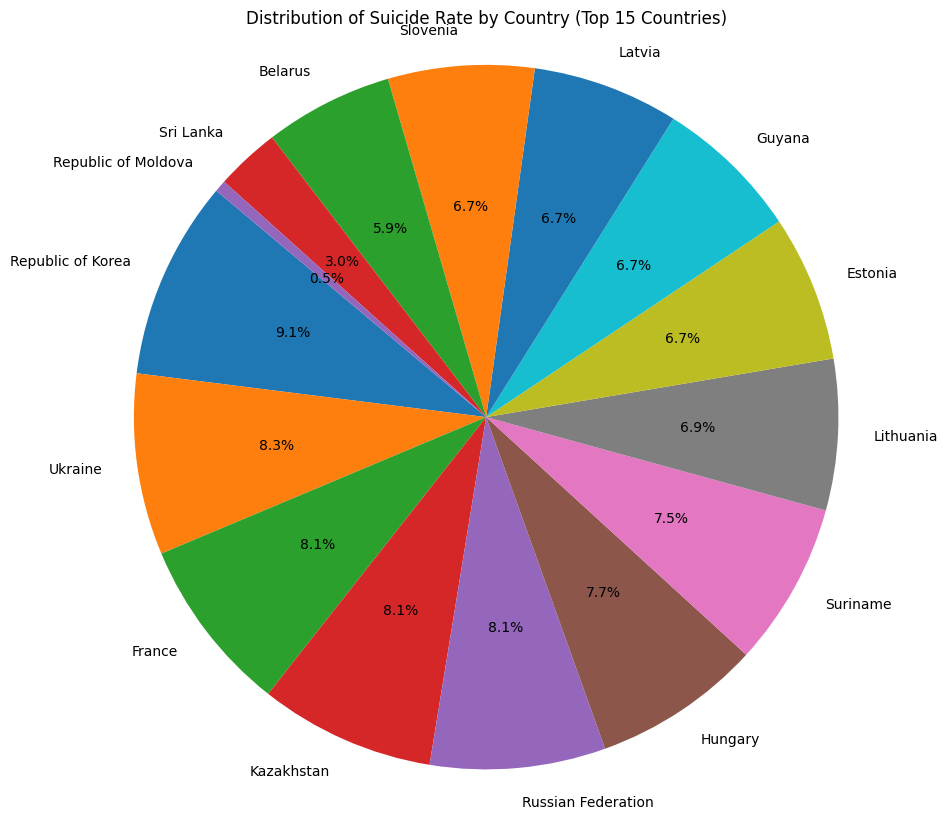

In [17]:

# Group the data by country and calculate the mean suicide rate
suicide_rate_by_country = df.groupby('country')['suicides/100k pop'].mean().reset_index()

# Sort the data by suicide rate in descending order and select the top 15 countries
top_15_countries = suicide_rate_by_country.sort_values(by='suicides/100k pop', ascending=False).head(15)

# Filter the original dataframe to include only data for the top 15 countries
df_top_15 = df[df['country'].isin(top_15_countries['country'])]

plt.figure(figsize=(10, 10))
country_counts = df_top_15['country'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Suicide Rate by Country (Top 15 Countries)')
plt.axis('equal')
plt.show()



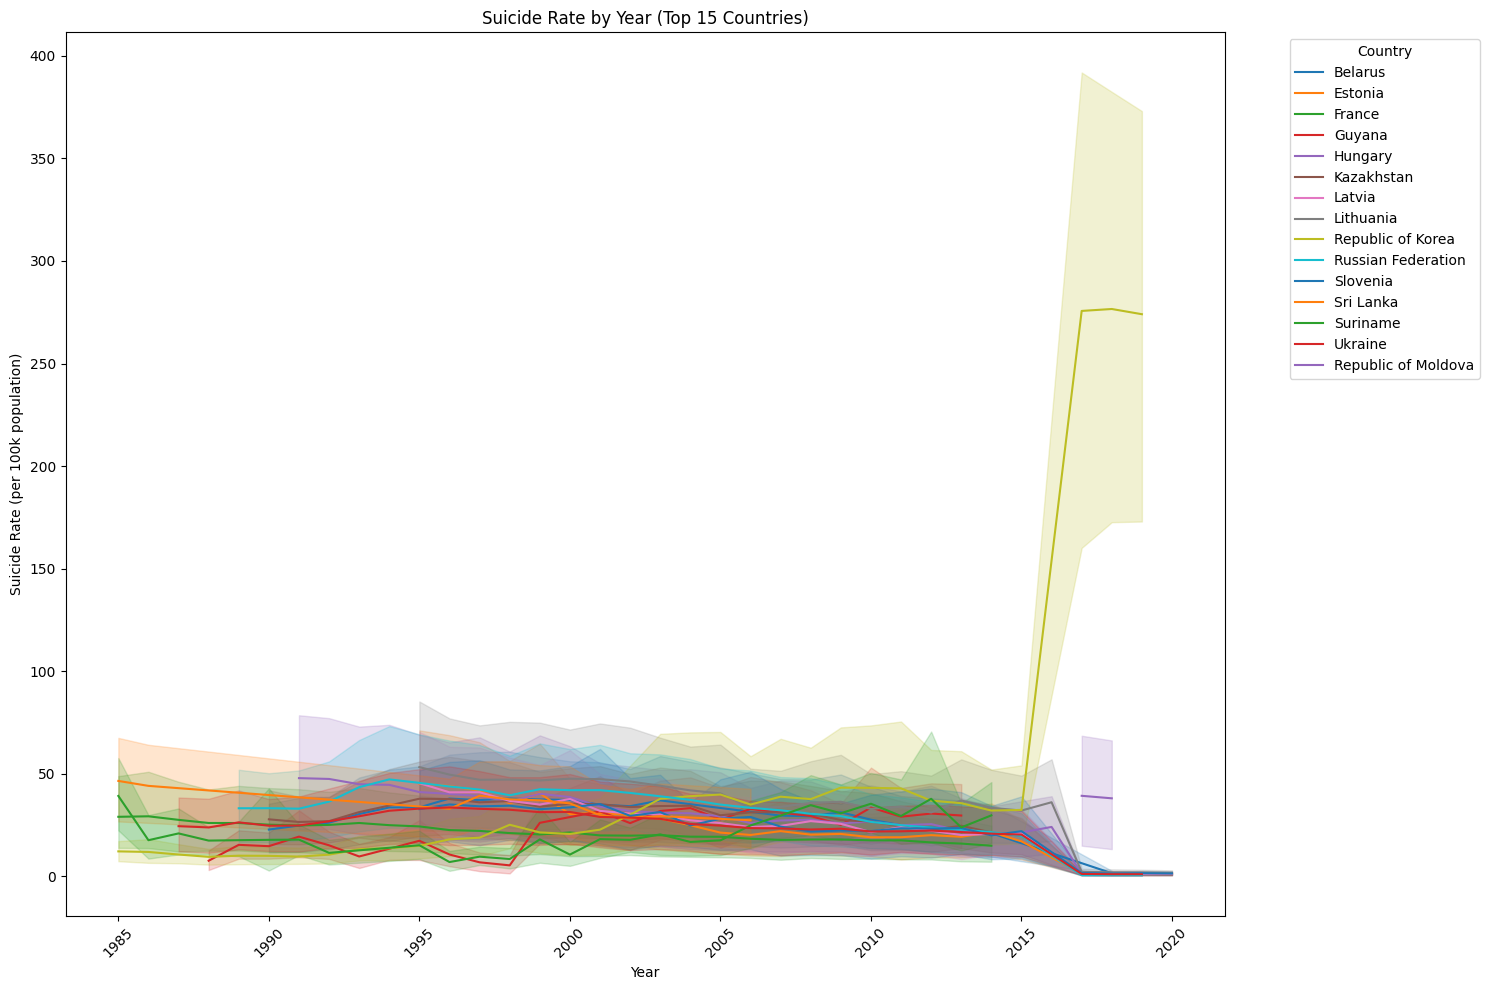

In [18]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_top_15, x='year', y='suicides/100k pop', hue='country', palette='tab10')
plt.title('Suicide Rate by Year (Top 15 Countries)')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


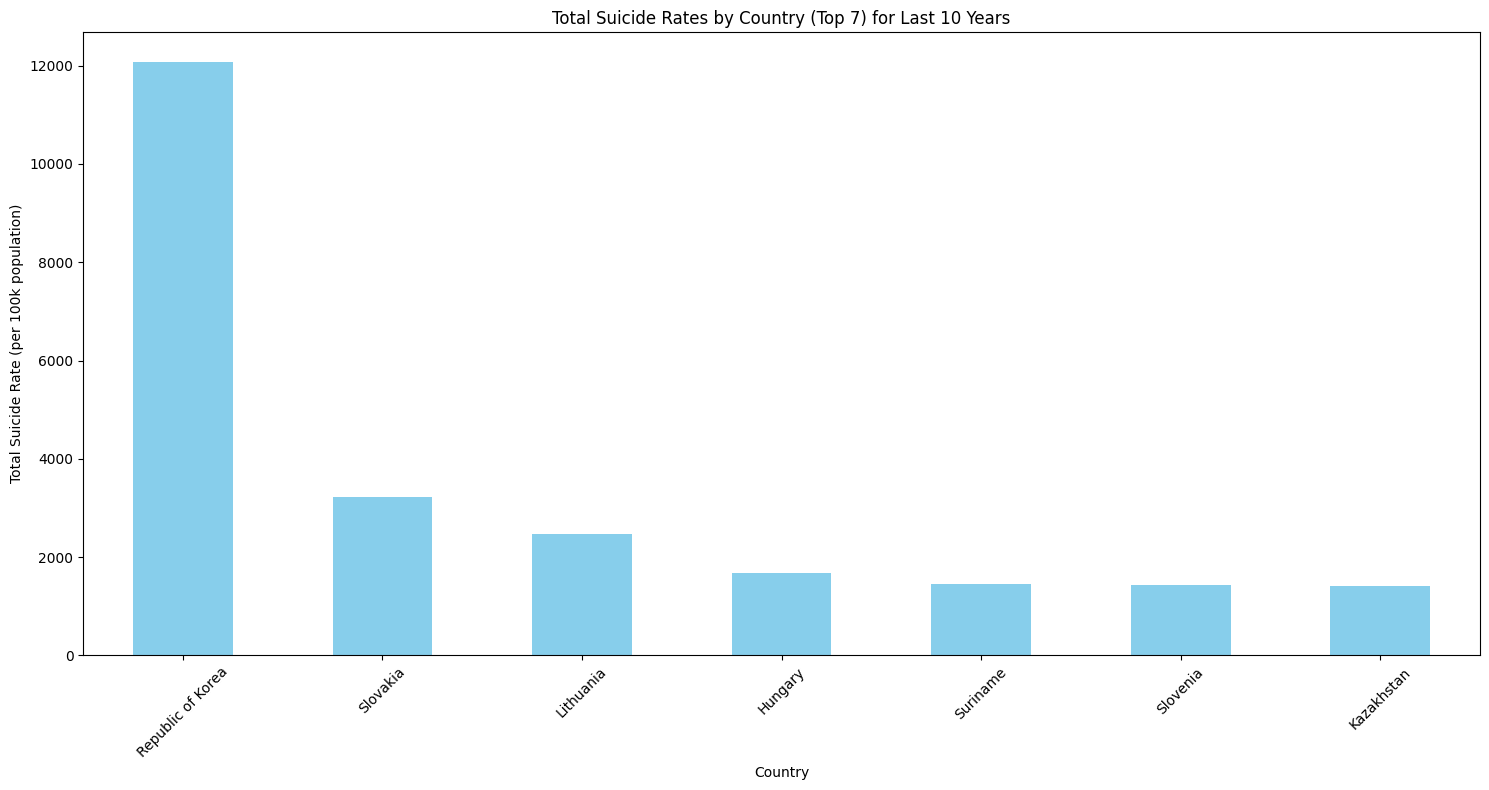

In [20]:
plt.figure(figsize=(15, 8))

# Filter data for the last 10 years
df_last_10_years = df[df['year'] >= df['year'].max() - 9]

# Calculate total suicide rates by country
total_suicide_rates = df_last_10_years.groupby('country')['suicides/100k pop'].sum().sort_values(ascending=False).head(7)

# Plot bar graph
total_suicide_rates.plot(kind='bar', color='skyblue')
plt.title('Total Suicide Rates by Country (Top 7) for Last 10 Years')
plt.xlabel('Country')
plt.ylabel('Total Suicide Rate (per 100k population)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()